# Basics

In [23]:
%autosave 30

Autosaving every 30 seconds


## Import Libraries

In [1]:
import os
import sys
import numpy as np
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
print(tf.__version__)

## For plotting script
script_path=os.environ.get('DirForPoolScripts')
sys.path.append(script_path)

2.6.0


## Download Datasets

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

--2021-12-16 11:23:26--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.185.208, 142.250.184.240, 172.217.16.144, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.185.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5,4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5,38M  8,83MB/s    in 0,6s    

2021-12-16 11:23:26 (8,83 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



# Data Preprocessing

In [3]:
vocab_size    = 10000   # lenght of interesting vocab length from Corpus
embedding_dim = 16      # dimension of different cluster for words to cluster
max_length    = 100     # max length of single sentence
trunc_type    = 'post'  # if exced max_length, truncate to end
padding_type  = 'post'  # if padding needed, do it in the end
oov_tok       = "<OOV>" # usual out-of-vocab token
training_size = 20000   # 20k of 27k sentences for training, rest 7k we keep for testing

## Opening json dataset

In [4]:
with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)
    
## an example of type of data we got from json dataset
## we are interested here in headline, is_sarcastic variable
datastore[0]

{'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5',
 'headline': "former versace store clerk sues over secret 'black code' for minority shoppers",
 'is_sarcastic': 0}

In [5]:
labels    = []
sentences = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

## Creating Trainnig/Testing dataset

In [6]:
## Training
training_sentences = sentences[0:training_size]
training_labels    = labels[0:training_size]

## Testing
testing_sentences  = sentences[training_size:]
testing_labels     = labels[training_size:]

## Initiating Tokenizer

In [7]:
## on training data
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index          = tokenizer.word_index
training_sequences  = tokenizer.texts_to_sequences(training_sentences)
training_padded_seq = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

## on testing data
testing_sequences  = tokenizer.texts_to_sequences(testing_sentences)
testing_padded_seq = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [8]:
## Lets convert them to numpy array
training_padded_seq = np.array(training_padded_seq)
training_labels     = np.array(training_labels)
testing_padded_seq  = np.array(testing_padded_seq)
testing_labels      = np.array(testing_labels)

# Modellling

## Model Definiation

In [9]:
 model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

2021-12-16 11:23:27.901390: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [11]:
num_epochs = 30
history = model.fit(training_padded_seq, 
                    training_labels, 
                    epochs=num_epochs, 
                    validation_data=(testing_padded_seq, testing_labels), 
                    verbose=2)

2021-12-16 11:23:28.267496: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
625/625 - 1s - loss: 0.6638 - accuracy: 0.5814 - val_loss: 0.5832 - val_accuracy: 0.6554
Epoch 2/30
625/625 - 1s - loss: 0.4271 - accuracy: 0.8335 - val_loss: 0.3809 - val_accuracy: 0.8447
Epoch 3/30
625/625 - 1s - loss: 0.3070 - accuracy: 0.8791 - val_loss: 0.3519 - val_accuracy: 0.8535
Epoch 4/30
625/625 - 1s - loss: 0.2551 - accuracy: 0.9000 - val_loss: 0.3446 - val_accuracy: 0.8563
Epoch 5/30
625/625 - 1s - loss: 0.2206 - accuracy: 0.9136 - val_loss: 0.3480 - val_accuracy: 0.8538
Epoch 6/30
625/625 - 1s - loss: 0.1926 - accuracy: 0.9264 - val_loss: 0.3582 - val_accuracy: 0.8551
Epoch 7/30
625/625 - 1s - loss: 0.1723 - accuracy: 0.9345 - val_loss: 0.3672 - val_accuracy: 0.8545
Epoch 8/30
625/625 - 1s - loss: 0.1536 - accuracy: 0.9433 - val_loss: 0.3831 - val_accuracy: 0.8541
Epoch 9/30
625/625 - 1s - loss: 0.1391 - accuracy: 0.9482 - val_loss: 0.4019 - val_accuracy: 0.8512
Epoch 10/30
625/625 - 1s - loss: 0.1244 - accuracy: 0.9567 - val_loss: 0.4247 - val_accuracy: 0.8478

## Plotting

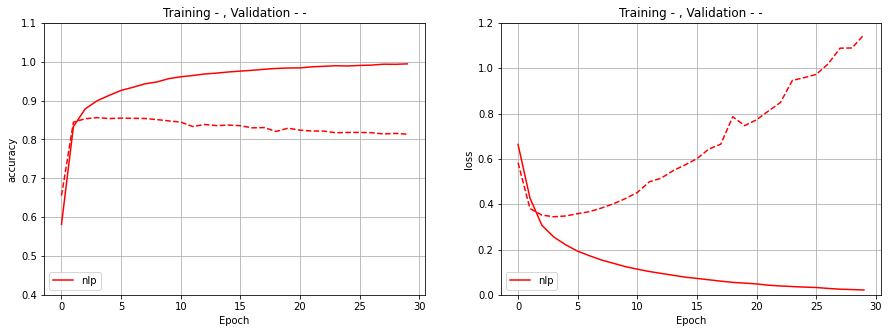

In [15]:
from ploting_script import plot_n_model 
plot_n_model(num_history=1, name_history=[history], label_list=["nlp"], 
             ylim_low_left=0.4, ylim_high_left=1.1,
             ylim_low_right=0, ylim_high_right=1.2)

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

In [ ]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

In [ ]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [ ]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

In [ ]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)

padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

# Optimizing accuracy/Loss function
1. since we fell in Overfitting region, we need to do some parameter optimization


## Approach-I

In [16]:
vocab_size    = 1000   # lenght of interesting vocab length from Corpus
embedding_dim = 16      # dimension of different cluster for words to cluster
max_length    = 20     # max length of single sentence
trunc_type    = 'post'  # if exced max_length, truncate to end
padding_type  = 'post'  # if padding needed, do it in the end
oov_tok       = "<OOV>" # usual out-of-vocab token
training_size = 20000   # 20k of 27k sentences for training, rest 7k we keep for testing

## on training data
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index          = tokenizer.word_index
training_sequences  = tokenizer.texts_to_sequences(training_sentences)
training_padded_seq = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

## on testing data
testing_sequences  = tokenizer.texts_to_sequences(testing_sentences)
testing_padded_seq = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

num_epochs = 30
history_approach_I = model.fit(training_padded_seq, 
                    training_labels, 
                    epochs=num_epochs, 
                    validation_data=(testing_padded_seq, testing_labels), 
                    verbose=2)

Epoch 1/30
625/625 - 1s - loss: 0.5467 - accuracy: 0.7211 - val_loss: 0.4182 - val_accuracy: 0.8071
Epoch 2/30
625/625 - 0s - loss: 0.3835 - accuracy: 0.8249 - val_loss: 0.3977 - val_accuracy: 0.8156
Epoch 3/30
625/625 - 0s - loss: 0.3642 - accuracy: 0.8345 - val_loss: 0.3984 - val_accuracy: 0.8173
Epoch 4/30
625/625 - 0s - loss: 0.3563 - accuracy: 0.8395 - val_loss: 0.3995 - val_accuracy: 0.8135
Epoch 5/30
625/625 - 0s - loss: 0.3533 - accuracy: 0.8395 - val_loss: 0.4013 - val_accuracy: 0.8135
Epoch 6/30
625/625 - 0s - loss: 0.3520 - accuracy: 0.8403 - val_loss: 0.4025 - val_accuracy: 0.8140
Epoch 7/30
625/625 - 0s - loss: 0.3496 - accuracy: 0.8400 - val_loss: 0.4046 - val_accuracy: 0.8110
Epoch 8/30
625/625 - 0s - loss: 0.3475 - accuracy: 0.8415 - val_loss: 0.4027 - val_accuracy: 0.8126
Epoch 9/30
625/625 - 0s - loss: 0.3453 - accuracy: 0.8427 - val_loss: 0.4068 - val_accuracy: 0.8083
Epoch 10/30
625/625 - 0s - loss: 0.3419 - accuracy: 0.8443 - val_loss: 0.4060 - val_accuracy: 0.8135

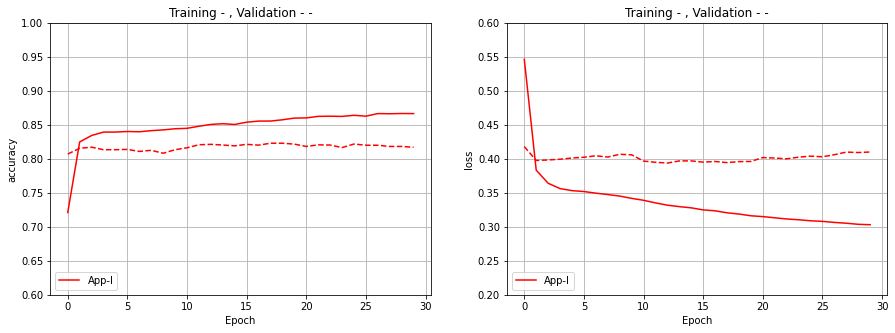

In [21]:
from ploting_script import plot_n_model 
plot_n_model(num_history=1, name_history=[history_approach_I], label_list=["App-I"], 
             ylim_low_left=0.6, ylim_high_left=1.0,
             ylim_low_right=0.2, ylim_high_right=0.6)

## Approach-II

In [22]:
vocab_size    = 1000   # lenght of interesting vocab length from Corpus
embedding_dim = 32      # dimension of different cluster for words to cluster
max_length    = 20     # max length of single sentence
trunc_type    = 'post'  # if exced max_length, truncate to end
padding_type  = 'post'  # if padding needed, do it in the end
oov_tok       = "<OOV>" # usual out-of-vocab token
training_size = 20000   # 20k of 27k sentences for training, rest 7k we keep for testing

## on training data
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index          = tokenizer.word_index
training_sequences  = tokenizer.texts_to_sequences(training_sentences)
training_padded_seq = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

## on testing data
testing_sequences  = tokenizer.texts_to_sequences(testing_sentences)
testing_padded_seq = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

num_epochs = 30
history_approach_II = model.fit(training_padded_seq, 
                    training_labels, 
                    epochs=num_epochs, 
                    validation_data=(testing_padded_seq, testing_labels), 
                    verbose=2)

Epoch 1/30
625/625 - 1s - loss: 0.5161 - accuracy: 0.7382 - val_loss: 0.4094 - val_accuracy: 0.8117
Epoch 2/30
625/625 - 0s - loss: 0.3779 - accuracy: 0.8273 - val_loss: 0.4013 - val_accuracy: 0.8153
Epoch 3/30
625/625 - 0s - loss: 0.3634 - accuracy: 0.8331 - val_loss: 0.4021 - val_accuracy: 0.8125
Epoch 4/30
625/625 - 0s - loss: 0.3576 - accuracy: 0.8360 - val_loss: 0.4100 - val_accuracy: 0.8083
Epoch 5/30
625/625 - 0s - loss: 0.3556 - accuracy: 0.8383 - val_loss: 0.4040 - val_accuracy: 0.8134
Epoch 6/30
625/625 - 0s - loss: 0.3536 - accuracy: 0.8401 - val_loss: 0.4047 - val_accuracy: 0.8122
Epoch 7/30
625/625 - 0s - loss: 0.3531 - accuracy: 0.8396 - val_loss: 0.4071 - val_accuracy: 0.8129
Epoch 8/30
625/625 - 0s - loss: 0.3511 - accuracy: 0.8412 - val_loss: 0.4045 - val_accuracy: 0.8131
Epoch 9/30
625/625 - 0s - loss: 0.3502 - accuracy: 0.8411 - val_loss: 0.4048 - val_accuracy: 0.8125
Epoch 10/30
625/625 - 0s - loss: 0.3492 - accuracy: 0.8407 - val_loss: 0.4055 - val_accuracy: 0.8134

# Comparison of Performance

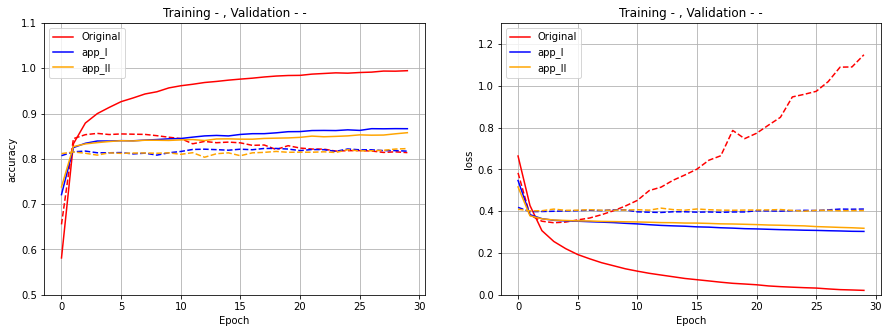

In [29]:
from ploting_script import plot_n_model 
plot_n_model(num_history=3, name_history=[history, history_approach_I, history_approach_II], label_list=["Original","app_I", "app_II"], 
                 ylim_low_left=0.5, ylim_high_left=1.1,
                 ylim_low_right=0, ylim_high_right=1.3,
                 leg_loc="upper left")